In [11]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [12]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [13]:
dhours=[]
dcnt=[]
opath='xst_off_mean'
fpath='xst_off'
dateformat='%Y-%m-%d-%H-%M'
dateformat2='%Y-%m-%d-%H'
from datetime import datetime,timedelta
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        #dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
        #print(band,ftime,dtime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

512
['2022-11-02-14'] [512]


In [14]:
#sis=[i for i in range(18)]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]

#sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
nsi=len(sis)

for ic,shour in enumerate(dhours[:]):
    if dcnt[ic]!=5: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([10,nsi,nsi],dtype='complex')
    cnt=np.zeros([10],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
#        fhour=ftime[:-3]
        if fhour!=shour: continue;
        try:
          D=loadXST(fpath+"/"+fn,sis);
        except:
          continue;
        cnt[band-318]+=D.shape[0];
        xst[band-318]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: Ru

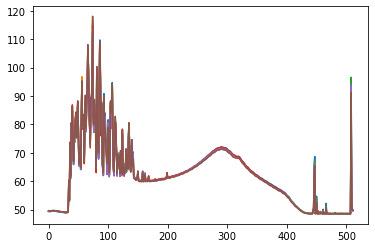

In [5]:
for si in range(len(sis)):
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [6]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
